In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

In [30]:
df = pd.read_csv(r"C:\Users\annab\OneDrive\Documentos\GitHub\Colabs\bases\Prematuro_semi_processado_NORMAL (2).csv")

In [31]:
df = df[df['CODMUNNASC'] != 'FERNANDO DE NORONHA']

# Coordenadas

In [32]:
coordenadas_cidades = {
    'ABREU E LIMA': (-34.8786, -7.9114),
    'AFOGADOS DA INGAZEIRA': (-37.6315, -7.7505),
    'AFRANIO': (-41.0101, -8.5117),
    'AGRESTINA': (-35.9446, -8.4597),
    'AGUA PRETA': (-35.5265, -8.7064),
    'AGUAS BELAS': (-37.1226, -9.1115),
    'ALAGOINHA': (-36.7667, -8.4667),
    'ALIANCA': (-35.2226, -7.6031),
    'ALTINHO': (-36.0645, -8.4845),
    'AMARAJI': (-35.4501, -8.3765),
    'ANGELIM': (-36.2909, -8.8845),
    'ARARIPINA': (-40.4987, -7.5704),
    'ARCOVERDE': (-37.0533, -8.4186),
    'BARRA DE GUABIRABA': (-35.6589, -8.4226),
    'BARREIROS': (-35.1848, -8.8160),
    'BELEM DE MARIA': (-35.7978, -8.6258),
    'BELEM DE SAO FRANCISCO': (-38.9628, -8.7549),
    'BELO JARDIM': (-36.4258, -8.3361),
    'BETANIA': (-38.0348, -8.1485),
    'BEZERROS': (-35.7969, -8.2326),
    'BODOCO': (-39.9331, -7.7773),
    'BOM CONSELHO': (-36.6816, -9.1697),
    'BOM JARDIM': (-35.5914, -7.7969),
    'BONITO': (-35.7293, -8.4708),
    'BREJAO': (-36.5667, -9.0327),
    'BREJINHO': (-37.2927, -7.3467),
    'BREJO DA MADRE DE DEUS': (-36.3743, -8.1451),
    'BUENOS AIRES': (-35.3188, -7.7245),
    'BUIQUE': (-37.1601, -8.6195),
    'CABO DE SANTO AGOSTINHO': (-35.0352, -8.2835),
    'CABROBO': (-39.3094, -8.5053),
    'CACHOEIRINHA': (-36.2348, -8.4855),
    'CAETES': (-36.6267, -8.7768),
    'CALCADO': (-36.3405, -8.7302),
    'CALUMBI': (-38.1518, -7.9358),
    'CAMARAGIBE': (-34.9784, -8.0235),
    'CAMOCIM DE SAO FELIX': (-35.7639, -8.3576),
    'CAMUTANGA': (-35.2649, -7.4051),
    'CANHOTINHO': (-36.1988, -8.8785),
    'CAPOEIRAS': (-36.6315, -8.7349),
    'CARNAIBA': (-37.7985, -7.7935),
    'CARNAUBEIRA DA PENHA': (-38.7511, -8.3181),
    'CARPINA': (-35.2519, -7.8458),
    'CARUARU': (-35.9602, -8.2836),
    'CASINHAS': (-35.7214, -7.7393),
    'CATENDE': (-35.7092, -8.6665),
    'CEDRO': (-39.2367, -7.7112),
    'CHA DE ALEGRIA': (-35.2049, -7.9868),
    'CHA GRANDE': (-35.4575, -8.2408),
    'CONDADO': (-35.0999, -7.5877),
    'CORRENTES': (-36.3241, -9.1211),
    'CORTES': (-35.5467, -8.4727),
    'CUMARU': (-35.6961, -8.0087),
    'CUPIRA': (-35.9516, -8.6144),
    'CUSTODIA': (-37.6434, -8.0882),
    'DORMENTES': (-40.7918, -8.4327),
    'ESCADA': (-35.2231, -8.3568),
    'EXU': (-39.7241, -7.5125),
    'FEIRA NOVA': (-35.3801, -7.9485),
    'FERNANDO DE NORONHA': (-32.4106, -3.8400),
    'FERREIROS': (-35.2378, -7.4471),
    'FLORES': (-37.9718, -7.8572),
    'FLORESTA': (-38.5867, -8.6004),
    'FREI MIGUELINHO': (-35.9187, -7.9395),
    'GAMELEIRA': (-35.3854, -8.5843),
    'GARANHUNS': (-36.4927, -8.8824),
    'GLORIA DO GOITA': (-35.2916, -8.0065),
    'GOIANA': (-34.9959, -7.5600),
    'GRANITO': (-39.2115, -7.7077),
    'GRAVATA': (-35.5641, -8.2111),
    'IATI': (-36.8491, -9.0458),
    'IBIMIRIM': (-37.6959, -8.5405),
    'IBIRAJUBA': (-36.1811, -8.5733),
    'IGARASSU': (-34.9155, -7.8294),
    'IGUARACY': (-37.5085, -7.8475),
    'INAJA': (-37.8358, -9.4165),
    'INGAZEIRA': (-37.4601, -7.6734),
    'IPOJUCA': (-35.0609, -8.3983),
    'IPUBI': (-40.1487, -7.6495),
    'ITACURUBA': (-38.6974, -8.7585),
    'ITAIBA': (-37.4177, -8.9474),
    'ILHA DE ITAMARACA': (-34.8333, -7.7488),
    'ITAMBE': (-35.1041, -7.4145),
    'ITAPETIM': (-37.1885, -7.3765),
    'ITAPISSUMA': (-34.8976, -7.7757),
    'ITAQUITINGA': (-35.1009, -7.6748),
    'JABOATAO DOS GUARARAPES': (-34.9167, -8.1128),
    'JAQUEIRA': (-35.7945, -8.7215),
    'JATAUBA': (-36.4942, -7.9767),
    'JATOBA': (-38.2076, -9.1835),
    'JOAO ALFREDO': (-35.5767, -7.8656),
    'JOAQUIM NABUCO': (-35.5293, -8.6194),
    'JUCATI': (-36.4871, -8.7112),
    'JUPI': (-36.4138, -8.7094),
    'JUREMA': (-36.1344, -8.7083),
    'LAGOA DO CARRO': (-35.3106, -7.8447),
    'LAGOA DE ITAENGA': (-35.2971, -7.9367),
    'LAGOA DO OURO': (-36.4627, -9.1259),
    'LAGOA DOS GATOS': (-35.9037, -8.6602),
    'LAGOA GRANDE': (-40.2767, -8.9943),
    'LAJEDO': (-36.3294, -8.6605),
    'LIMOEIRO': (-35.4527, -7.8774),
    'MACAPARANA': (-35.4423, -7.5557),
    'MACHADOS': (-35.5183, -7.6888),
    'MANARI': (-37.6311, -8.9647),
    'MARAIAL': (-35.8268, -8.7914),
    'MIRANDIBA': (-38.7331, -8.1215),
    'MORENO': (-35.0933, -8.1183),
    'NAZARE DA MATA': (-35.2265, -7.7411),
    'OLINDA': (-34.8553, -7.9998),
    'OROBO': (-35.5958, -7.7461),
    'OROCO': (-39.6165, -8.6227),
    'OURICURI': (-40.0786, -7.8798),
    'PALMARES': (-35.5894, -8.6845),
    'PALMEIRINA': (-36.3241, -9.0047),
    'PANELAS': (-36.0128, -8.6641),
    'PARANATAMA': (-36.6541, -8.9175),
    'PARNAMIRIM': (-39.5806, -7.8471),
    'PASSIRA': (-35.5815, -7.9947),
    'PAUDALHO': (-35.1713, -7.9028),
    'PAULISTA': (-34.8735, -7.9404),
    'PEDRA': (-36.9372, -8.4965),
    'PESQUEIRA': (-36.6973, -8.3575),
    'PETROLANDIA': (-38.2173, -9.0689),
    'PETROLINA': (-40.5001, -9.3899),
    'POCAO': (-36.7113, -8.1867),
    'POMBOS': (-35.3963, -8.1411),
    'PRIMAVERA': (-35.3539, -8.3294),
    'QUIPAPA': (-36.0133, -8.8278),
    'QUIXABA': (-37.8445, -7.7074),
    'RECIFE': (-34.8813, -8.0476),
    'RIACHO DAS ALMAS': (-35.8533, -8.1376),
    'RIBEIRAO': (-35.3786, -8.5111),
    'RIO FORMOSO': (-35.1625, -8.6594),
    'SAIRE': (-35.7173, -8.3271),
    'SALGADINHO': (-35.6527, -7.9265),
    'SALGUEIRO': (-39.1216, -7.8427),
    'SALOA': (-36.6912, -8.9725),
    'SANHARO': (-36.5667, -8.3606),
    'SANTA CRUZ': (-40.3434, -8.2404),
    'SANTA CRUZ DA BAIXA VERDE': (-38.1483, -7.8125),
    'SANTA CRUZ DO CAPIBARIBE': (-36.2003, -7.9575),
    'SANTA FILOMENA': (-40.6071, -7.3127),
    'SANTA MARIA DA BOA VISTA': (-39.8255, -8.7973),
    'SANTA MARIA DO CAMBUCA': (-35.8947, -7.8308),
    'SANTA TEREZINHA': (-37.4781, -7.3758),
    'SAO BENEDITO DO SUL': (-35.9481, -8.8183),
    'SAO BENTO DO UNA': (-36.4451, -8.5288),
    'SAO CAITANO': (-36.1375, -8.3374),
    'SAO JOAO': (-36.3676, -8.8756),
    'SAO JOAQUIM DO MONTE': (-35.8033, -8.4319),
    'SAO JOSE DA COROA GRANDE': (-35.1473, -8.8894),
    'SAO JOSE DO BELMONTE': (-38.7588, -7.8615),
    'SAO JOSE DO EGITO': (-37.2734, -7.4697),
    'SAO LOURENCO DA MATA': (-34.9731, -8.0069),
    'SAO VICENTE FERRER': (-35.4934, -7.5897),
    'SERRA TALHADA': (-38.2975, -7.9817),
    'SERRITA': (-39.2956, -7.9402),
    'SERTANIA': (-37.2689, -8.0734),
    'SIRINHAEM': (-35.1147, -8.5864),
    'MOREILANDIA': (-39.5464, -7.6219),
    'SOLIDAO': (-37.6465, -7.5954),
    'SURUBIM': (-35.7546, -7.8475),
    'TABIRA': (-37.5371, -7.5893),
    'TACAIMBO': (-36.1385, -8.3085),
    'TACARATU': (-38.1512, -9.0978),
    'TAMANDARE': (-35.1047, -8.7567),
    'TAQUARITINGA DO NORTE': (-36.0321, -7.9023),
    'TEREZINHA': (-36.6287, -9.0568),
    'TERRA NOVA': (-39.3794, -8.2225),
    'TIMBAUBA': (-35.3181, -7.5043),
    'TORITAMA': (-36.0628, -8.0039),
    'TRACUNHAEM': (-35.2318, -7.8026),
    'TRINDADE': (-40.2641, -7.7605),
    'TRIUNFO': (-38.0976, -7.8327),
    'TUPANATINGA': (-37.3406, -8.7519),
    'TUPARETAMA': (-37.3421, -7.6028),
    'VENTUROSA': (-36.8743, -8.5785),
    'VERDEJANTE': (-39.6015, -7.9221),
    'VERTENTE DO LERIO': (-35.8561, -7.7802),
    'VERTENTES': (-35.9683, -7.9017),
    'VICENCIA': (-35.3261, -7.6561),
    'VITORIA DE SANTO ANTAO': (-35.2913, -8.1189),
    'XEXEU': (-35.6214, -8.8025)
}

def buscar_coordenadas(cidade):
    return coordenadas_cidades.get(cidade, (None, None))

df[['longitude', 'latitude']] = df['CODMUNNASC'].apply(lambda x: pd.Series(buscar_coordenadas(x)))

print(df)

         CODESTAB              CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       5390044.0            ABREU E LIMA        1        29        2.0   
1       5390044.0            ABREU E LIMA        1        30        2.0   
2       5390044.0            ABREU E LIMA        1        20        5.0   
3       5390044.0            ABREU E LIMA        1        24        2.0   
4       5390044.0            ABREU E LIMA        1        26        1.0   
...           ...                     ...      ...       ...        ...   
514705  2712008.0  VITORIA DE SANTO ANTAO        1        37        1.0   
514706  2429314.0                   XEXEU        1        17        5.0   
514707        NaN                   XEXEU        3        26        1.0   
514708        NaN                   XEXEU        3        25        1.0   
514709        NaN               PETROLINA        3        35        2.0   

        ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  CODMUNRES  ...  \
0          5.0    999992.0   

In [33]:
selected_columns = [
    'CODMUNNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'GESTACAO',
    'DTNASC', 'RACACOR', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'RACACORMAE',
    'longitude', 'latitude', 'CODMUNRES'
]

df = df[selected_columns]

# Mapeamento

In [34]:
df_prema = df[df['GESTACAO'] >= 4]

In [35]:
import geopandas as gpd

selected_columns = ['CODMUNRES', 'CODMUNNASC', 'longitude', 'latitude']
filtered_data = df_prema[selected_columns]

residence_coords = filtered_data.groupby('CODMUNRES').agg({'longitude': 'mean', 'latitude': 'mean'}).reset_index()
birth_coords = filtered_data.groupby('CODMUNNASC').agg({'longitude': 'mean', 'latitude': 'mean'}).reset_index()

residence_coords.columns = ['CODMUNRES', 'res_longitude', 'res_latitude']
birth_coords.columns = ['CODMUNNASC', 'birth_longitude', 'birth_latitude']

merged_data = filtered_data.merge(residence_coords, on='CODMUNRES').merge(birth_coords, on='CODMUNNASC')
flows = merged_data.groupby(['res_longitude', 'res_latitude', 'birth_longitude', 'birth_latitude']).size().reset_index(name='flow')

flows.head()

,res_longitude,res_latitude,birth_longitude,birth_latitude,flow
0,-40.774618,-8.880207,-41.0101,-8.5117,404
1,-40.774618,-8.880207,-40.7918,-8.4327,1
2,-40.774618,-8.880207,-40.5001,-9.3899,302
3,-40.774618,-8.880207,-39.3794,-8.2225,1
4,-40.774618,-8.880207,-39.1216,-7.8427,3


In [36]:
selected_columns = ['CODMUNRES', 'CODMUNNASC', 'longitude', 'latitude']
filtered_data = df_prema[selected_columns]

residence_coords = filtered_data.groupby('CODMUNRES').agg({'longitude': 'mean', 'latitude': 'mean'}).reset_index()
birth_coords = filtered_data.groupby('CODMUNNASC').agg({'longitude': 'mean', 'latitude': 'mean'}).reset_index()

residence_coords.columns = ['CODMUNRES', 'res_longitude', 'res_latitude']
birth_coords.columns = ['CODMUNNASC', 'birth_longitude', 'birth_latitude']

merged_data = filtered_data.merge(residence_coords, on='CODMUNRES').merge(birth_coords, on='CODMUNNASC')
flows = merged_data.groupby(['res_longitude', 'res_latitude', 'birth_longitude', 'birth_latitude']).size().reset_index(name='flow')

print(flows.head())

   res_longitude  res_latitude  birth_longitude  birth_latitude  flow
0     -40.774618     -8.880207         -41.0101         -8.5117   404
1     -40.774618     -8.880207         -40.7918         -8.4327     1
2     -40.774618     -8.880207         -40.5001         -9.3899   302
3     -40.774618     -8.880207         -39.3794         -8.2225     1
4     -40.774618     -8.880207         -39.1216         -7.8427     3


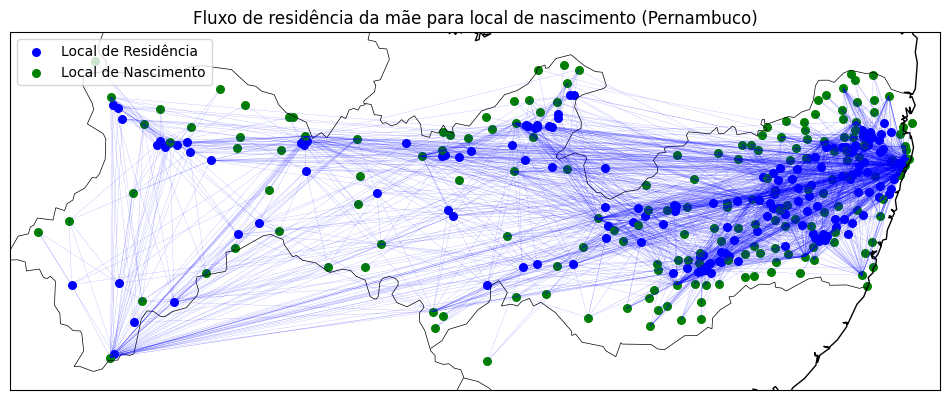

In [37]:
longitude_min = flows[['res_longitude', 'birth_longitude']].min().min()
longitude_max = flows[['res_longitude', 'birth_longitude']].max().max()
latitude_min = flows[['res_latitude', 'birth_latitude']].min().min()
latitude_max = flows[['res_latitude', 'birth_latitude']].max().max()

plt.figure(figsize=(12, 10))
m = Basemap(
    projection='merc',
    llcrnrlat=latitude_min - 0.2, urcrnrlat=latitude_max + 0.2, 
    llcrnrlon=longitude_min - 0.2, urcrnrlon=longitude_max + 0.2, 
    resolution='i'
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

max_flow = flows['flow'].max() 
for _, row in flows.iterrows():
    try:
        res_x, res_y = m(row['res_longitude'], row['res_latitude'])
        birth_x, birth_y = m(row['birth_longitude'], row['birth_latitude'])
        line_color = 'blue' if (row['res_longitude'] != row['birth_longitude'] or 
                                row['res_latitude'] != row['birth_latitude']) else 'red'

        line_width = 0.1 + (row['flow'] / max_flow) * 2 
        m.plot(
            [res_x, birth_x], [res_y, birth_y], 
            color=line_color, linewidth=line_width, alpha=0.7  
        )
    except ValueError:
        continue

res_coords = flows[['res_longitude', 'res_latitude']].drop_duplicates()
birth_coords = flows[['birth_longitude', 'birth_latitude']].drop_duplicates()

for _, row in res_coords.iterrows():
    res_x, res_y = m(row['res_longitude'], row['res_latitude'])
    m.scatter(res_x, res_y, color='blue', s=30, label='Local de Residência')

for _, row in birth_coords.iterrows():
    birth_x, birth_y = m(row['birth_longitude'], row['birth_latitude'])
    m.scatter(birth_x, birth_y, color='green', s=30, label='Local de Nascimento')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=10)

plt.title("Fluxo de residência da mãe para local de nascimento (Pernambuco)", fontsize=12)
plt.show()

#afunilar mais a visualização (infomap) (distribuição das comunidades) (comparação por ano) (qtd de municipios por comunidade)
# manter as direções (testar sem as direções)
# comparar o infomap com outro algoritimo
# verificar se existe algum atlas referentes a areas de parto prematuro (geral, brasil e pernambuco)
# caracterização da sregões enumeradas
# testar algum tipo de regressão como justificativa
# modelagem dos dados atraves de modelos hierarquicos (exemplo da aula)

# Infomap

In [40]:
import networkx as nx
from infomap import Infomap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Criação do Grafo
G = nx.Graph()

# Adiciona nós para cada local de residência e nascimento
for _, row in flows.iterrows():
    res_node = f"res_{row['res_longitude']}_{row['res_latitude']}"
    birth_node = f"birth_{row['birth_longitude']}_{row['birth_latitude']}"
    
    # Adiciona nós e uma aresta entre eles com peso igual ao fluxo
    G.add_edge(res_node, birth_node, weight=row['flow'])

# Passo 2: Aplicando Infomap
infomap = Infomap()
for edge in G.edges(data=True):
    infomap.addLink(edge[0], edge[1], edge[2]['weight'])

infomap.run()

# Obter as comunidades detectadas
communities = {}
for node in infomap.getModules():
    for member in infomap.getNodesInModule(node):
        communities[member] = node  # Mapeia cada nó para a sua comunidade


ModuleNotFoundError: No module named 'infomap'